# Biological Duplicate PTM Correlations

## Non-reproducible Systematic Variation in Cell Line Data
Of the 45 cell lines measured in the PTM experimental data three cell lines are duplicated - resulting in 42 unique cell lines. We showed in a different notebook that the PTM distributions (measuring ~4000 PTMs for each cell line) showed systematic variation that was unlikely to be biological in nature. Furthermore, we showed that biological replicate experiments showed a non-reproducible systematic variation, which further indicates that this variation is not biological. 

## Normalization and Gene-Expression Comparison 
We proposed that we correct for this variation using cell-line quantile normalization to enforce that the cell lines have the same distributions. However, this normalization might also introduce other problems and reduce the overall quality of the data. In a different notebook, we showed that cell line quantile normalization (as well as quantile normalization followed by PTM Z-score normalization) improved the correlation of cell-line/cell-line distances in gene-expression-space and PTM-space. In other words normalization of the PTM data improved the similarity of how cell lines are arranged in the two spaces (gene-expression and PTM) where we expect the cell lines to behave similarly in both spaces. 

## PTM Correlation in Biological Replicates
We can also use the correlation of PTM values between biological replicates (and non-biological replicates) to check the quality of our data. We would expect that biological replicates (3 instances) will be more correlated than non-replicates. We can also check whether our normalization preserves the absolute correlations and relative correlations (biological-replicate vs non-replicate). 

In [1]:
import bio_duplicate_correlation

In [2]:
fig_data = bio_duplicate_correlation.compare_duplicate_non_duplicate_correlation()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

# fig = fig_data.plot(kind='bar', figsize=(10,5))
# full_title = 'PTM Correlation of Bio-Replicates and Non-Bio-Replicates'
# fig.set_title(full_title)

## Cell-Line Quantile Normalization Effect
The above bar graph shows Non-Biological-Repeats vs Biological-Repeat correlation (Pearson) for six different conditions (there are 12 bars in sets of 2). The six conditions are:

1) No normalization (none)
2) Cell-line quantile normalization (col-qn)
3) Cell-line quantile normalization and row Z-score (col-qn_row-zscore)
4) No-missing values No normalization (filter_none)
5) No-missing values Cell-line quantile normalization (filter_col-qn)
6) No-missing values Cell-line quantile normalization and row Z-score (filter_col-qn_row-zscore)

The first two bars show us that correlation of biological repeats (3 instances) is greater than the other non-biological repeat combinations (987 other cell line combinations). The next two bars show that cell-line quantile normalization actually increases the correlation of both repeat and non-repeats. The third set of bars shows us that while row Z-score normalization reduces the overall cell-line/cell-line correlations we still have a large relative difference in the correlations of repeat vs non-repeats (we expect that Z-score normalization will reduce the overall correlation). The last set of six bars is the same as the first except that PTMs with missing values have been first filtered out.


We see that fitlering out PTMs with missing values first gives similar results. Cell-line quantile normalization does not reduce the overall correlations and biological-replicate correlation is still higher than non-replicate correlation. 

# Conclusions
Based on this, we can conclude that 1) cell-line quantile normalization does not reduce the cell-line/cell-line correlation (in fact it increases it when no filtering is done), this is not dependent on missing PTMs, and Z-score row normalization in addition to cell-line quantile normalization maintains the difference in correlation between biological-replicates and non-replicates. So, we can conclude that cell-line quantile normalization does not reduce the quality of the data as measued by cell-line/cell-line correlation of PTM data. 

In [4]:
import bio_duplicate_correlation
df_scatter = bio_duplicate_correlation.view_scatter()

(8468, 45)
(8468, 45)


In [5]:
df_scatter.shape
cols = df_scatter.columns.tolist()

In [6]:
import pandas as pd
import numpy as np
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

/Users/nickfernandez/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


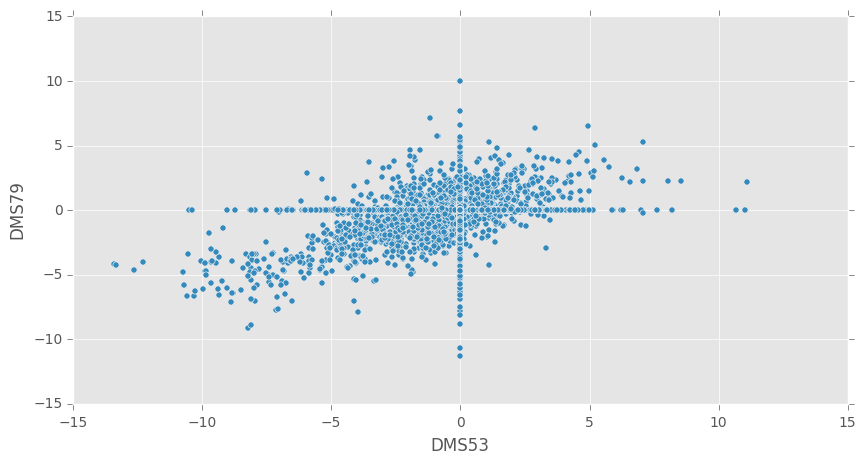

In [7]:
# s.plot(kind='bar', figsize=(10,5))
# df_scatter = df_scatter.transpose()
df_scatter.plot(kind='scatter', figsize=(10,5), x=cols[4], y=cols[5])



In [8]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

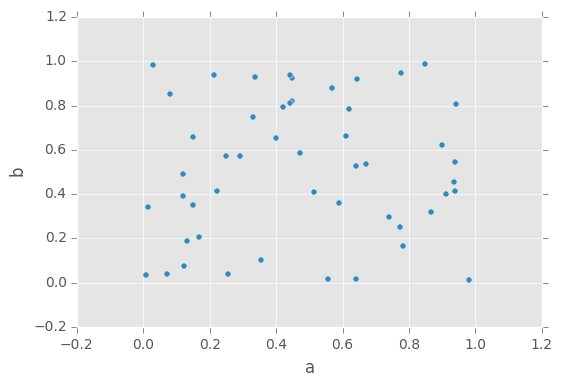

In [9]:
df.plot(kind='scatter', x='a', y='b')

In [10]:
inst_series = df_scatter[cols[0]]

In [11]:
print(type(inst_series))

<class 'pandas.core.series.Series'>


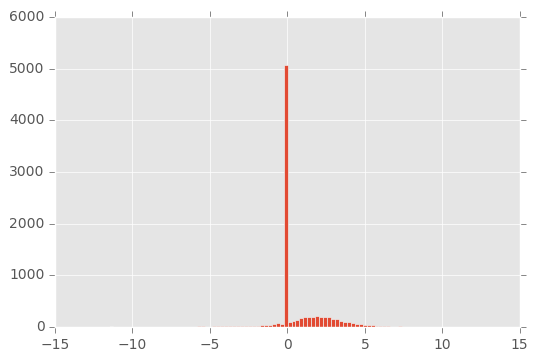

In [12]:
inst_series.hist(bins=100)